# STAT 207: Advanced Optimization Topics




## Linear Programming

- A general linear program takes the form:

$$
\begin{aligned}
\text{minimize} & \quad \mathbf{c}^\top \mathbf{x} \\
\text{subject to} & \quad \mathbf{A}\mathbf{x} = \mathbf{b} \\
& \quad \mathbf{G}\mathbf{x} \preceq \mathbf{h}.
\end{aligned}
$$

A linear program is a convex optimization problem, why?

<div>
<img src="lp.jpg" alt="LP" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.7\textwidth]{lp.jpg}
\end{center}

- The **standard form** of a linear program (LP) is:

$$
\begin{aligned}
\text{minimize} & \quad \mathbf{c}^\top \mathbf{x} \\
\text{subject to} & \quad \mathbf{A}\mathbf{x} = \mathbf{b} \\
& \quad \mathbf{x} \succeq \mathbf{0}
\end{aligned}
$$

To transform a general linear program into the standard form, we introduce *slack variables* $\mathbf{s} \succeq \mathbf{0}$ such that $\mathbf{G}\mathbf{x} + \mathbf{s} = \mathbf{h}$. Then we write $\mathbf{x} = \mathbf{x}^+ - \mathbf{x}^-$, where $\mathbf{x}^+ \succeq \mathbf{0}$ and $\mathbf{x}^- \succeq \mathbf{0}$. This yields the problem:

$$
\begin{aligned}
\text{minimize} & \quad \mathbf{c}^\top (\mathbf{x}^+ - \mathbf{x}^-) \\
\text{subject to} & \quad \mathbf{A}(\mathbf{x}^+ - \mathbf{x}^-) = \mathbf{b} \\
& \quad \mathbf{G}(\mathbf{x}^+ - \mathbf{x}^-) + \mathbf{s} = \mathbf{h} \\
& \quad \mathbf{x}^+ \succeq \mathbf{0}, \quad \mathbf{x}^- \succeq \mathbf{0}, \quad \mathbf{s} \succeq \mathbf{0}
\end{aligned}
$$

The slack variables are often used to transform complicated inequality constraints into simpler non-negativity constraints.

- The **inequality form** of a linear program (LP) is:

$$
\begin{aligned}
\text{minimize} & \quad \mathbf{c}^\top \mathbf{x} \\
\text{subject to} & \quad \mathbf{G}\mathbf{x} \preceq \mathbf{h}
\end{aligned}
$$

\begin{verbatim}
scipy.optimize.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, 
                       bounds=None, method='highs', callback=None, 
                       options=None, x0=None, integrality=None)
\end{verbatim}

### Examples

- A piecewise-linear minimization problem can be transformed to an LP. The original problem:

$$
\text{minimize } \max_{i=1,\ldots,m} (\mathbf{a}_i^T\mathbf{x} + b_i)
$$

can be transformed to the following LP:

$$
\begin{aligned}
\text{minimize }& \mathbf{t}\\
\text{subject to }& \mathbf{a}_i^T\mathbf{x} + b_i \leq \mathbf{t}, \quad i=1,\ldots,m,
\end{aligned}
$$

in $\mathbf{x}$ and $\mathbf{t}$. 

Apparently, the following LP formulations:

$$
\text{minimize } \max_{i=1,\ldots,m} |\mathbf{a}_i^T\mathbf{x} + b_i|
$$

and

$$
\text{minimize } \max_{i=1,\ldots,m} (\mathbf{a}_i^T\mathbf{x} + b_i)^+
$$

are also LP.

- Any convex optimization problem, defined as:

$$
\begin{aligned}
\text{minimize }& f_0(\mathbf{x}) \\
\text{subject to }& f_i(\mathbf{x}) \leq 0, \quad i=1,\ldots,m, \\
& \mathbf{a}_i^T\mathbf{x} = b_i, \quad i=1,\ldots,p,
\end{aligned}
$$

where $f_0,\ldots,f_m$ are convex functions, can be transformed to the *epigraph* form:

$$
\begin{aligned}
\text{minimize }& t \\
\text{subject to }& f_0(\mathbf{x}) - t \leq 0, \\
& f_i(\mathbf{x}) \leq 0, \quad i=1,\ldots,m, \\
& \mathbf{a}_i^T\mathbf{x} = b_i, \quad i=1,\ldots,p,
\end{aligned}
$$

in variables $\mathbf{x}$ and $t$. That is why people often say linear programming is universal.

- The linear fractional programming problem, defined as:

$$
\begin{aligned}
\text{minimize }& \frac{\mathbf{c}^T\mathbf{x} + d}{\mathbf{e}^T\mathbf{x} + f} \\
\text{subject to }& \mathbf{A}\mathbf{x} = \mathbf{b}, \\
& \mathbf{G}\mathbf{x} \preceq \mathbf{h}\\
& \mathbf{e}^T\mathbf{x} + f > 0,
\end{aligned}
$$

can be transformed to an LP (linear programming) problem:

$$
\begin{aligned}
\text{minimize }& \mathbf{c}^T\mathbf{y} + dz \\
\text{subject to }& \mathbf{G}\mathbf{y} - z\mathbf{h} \preceq \mathbf{0},\\
& \mathbf{A}\mathbf{y} - z\mathbf{b} = \mathbf{0}, \\
& \mathbf{e}^T\mathbf{y} + f z = 1, \\
& z \geq 0,
\end{aligned}
$$

in variables $\mathbf{y}$ and $z$, via the transformation of variables:

$$
\mathbf{y} = \frac{\mathbf{x}}{\mathbf{e}^T\mathbf{x} + f}, \quad z = \frac{1}{\mathbf{e}^T\mathbf{x} + f}.
$$

Refer to Section 4.3.2 of Boyd and Vandenberghe (2004) for a proof.


### Lasso Problem

- Greedy coordinate descent: updating one coordinate (or parameter) at a time by selecting the coordinate that provides the most significant reduction in the objective function.
  
- Cyclic coordinate descent: updates the coordinates in a fixed cyclic order. It repeatedly cycles through the coordinates, updating each one in turn while keeping the others fixed.

Solve the Lasso $\ell$-1 penalized regression problem:
$$
\text{minimize } f(\beta) =  \frac{1}{2}\|y - X\beta\|_2^2 + \lambda\|\beta\|_1.
$$

The coordinate direction for $\beta_j$ is
$$
\frac{\partial}{\partial \beta_j}f(\beta) = (y - X\beta)X_j + \lambda s_j,
$$
where $s_j\in \{1,-1\}$ is the sign of $\beta_j$. Further, the directional derivates are
$$
d_{e_j} f(\beta) = \lim_{t \downarrow 0} \frac{f(\beta + t e_j) - f(\beta)}{t} = (y - X\beta)X_j + \lambda,
$$
$$
d_{-e_j} f(\beta) = \lim_{t \downarrow 0} \frac{f(\beta - t e_j) - f(\beta)}{t} = - (y - X\beta)X_j + \lambda.
$$
Hence $\beta_j$ moves to the right if $(y - X\beta)X_j < -\lambda$, to the left if $(y - X\beta)X_j > \lambda$, and stays fixed otherwise.


In [44]:
import numpy as np

def soft_thresholding(rho, lambda_):
    if rho < - lambda_:
        return (rho + lambda_)
    elif rho > lambda_:
        return (rho - lambda_)
    else:
        return 0

def lasso_coordinate_descent(X, y, lambda_, 
                             num_iters=100, tol=1e-4,
                            verbose = False):
    m, n = X.shape
    beta = np.zeros(n)
    beta_prev = np.zeros(n)
    
    for iteration in range(num_iters):
        for j in range(n):
            X_j = X[:, j]
            residual = y - X @ beta + beta[j] * X_j  # partial residual
            rho = np.dot(X_j, residual)
            beta[j] = soft_thresholding(rho, lambda_)  # update rule
        
        # Check for convergence
        if np.linalg.norm(beta - beta_prev, ord=2) < tol:
            if verbose: 
                print(f"Converged in {iteration + 1} iterations.")
            break
        
        beta_prev = beta.copy()
    
    return beta


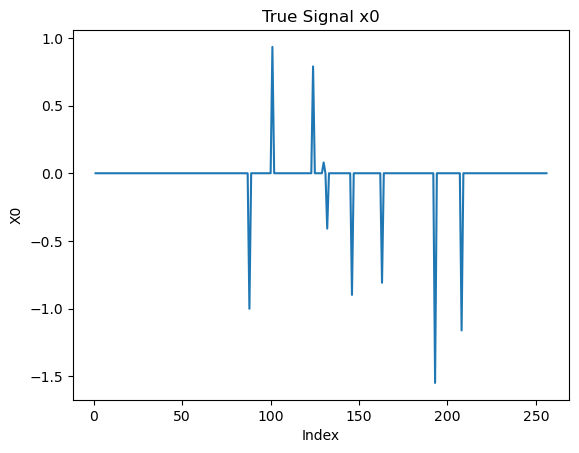

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# random seed
np.random.seed(24)

# Size of signal
n = 256

# Sparsity (# nonzeros) in the signal
s = 10

# Number of samples (undersample by a factor of 8)
m = 64

# Generate and display the signal
x0 = np.zeros(n)
nonzero_indices = np.random.choice(np.arange(n), s)
x0[nonzero_indices] = np.random.randn(s)

# Generate the random sampling matrix
A = np.random.randn(m, n) / m

# Subsample by multiplexing
y = A.dot(x0)

# Plot the true signal
plt.figure()
plt.title("True Signal x0")
plt.xlabel("Index")
plt.ylabel("X0")
plt.plot(np.arange(1, n+1), x0)
plt.show()


Converged in 3 iterations.


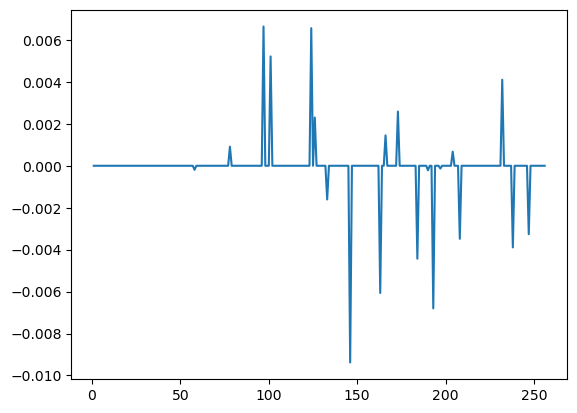

In [52]:
# Example usage
lambda_ = 0.01

beta = lasso_coordinate_descent(A, y, lambda_,
                               verbose = True)

plt.plot(np.arange(1, n+1), beta)

In [50]:
# Range of lambda values
lambda_values = np.logspace(-1,-2, 100)

# Store the coefficients for each lambda
coefficients = []
errors = []

for lambda_ in lambda_values:
    beta = lasso_coordinate_descent(A, y, lambda_)
    coefficients.append(beta)
    predictions = A @ beta
    error = np.mean((y - predictions) ** 2)  # Mean Squared Error
    errors.append(error)

coefficients = np.array(coefficients)
errors = np.array(errors)


In [53]:
def lasso_greedy_coordinate_descent(X, y, lambda_, num_iters=100, tol=1e-4,
                            verbose = False):
    m, n = X.shape
    beta = np.zeros(n)
    beta_prev = np.zeros(n)
    
    for iteration in range(num_iters):
        max_decrease = 0
        for j in range(n):
            X_j = X[:, j]
            residual = y - X @ beta + beta[j] * X_j  # partial residual
            rho = np.dot(X_j, residual)
            new_beta_j = soft_thresholding(rho, lambda_)
            
            # Calculate the decrease in the objective function
            decrease = abs(beta[j] - new_beta_j)
            if decrease > max_decrease:
                max_decrease = decrease
                max_index = j
                best_beta_j = new_beta_j
        
        # Update the coordinate with the largest decrease
        beta[max_index] = best_beta_j
        
        # Check for convergence
        if np.linalg.norm(beta - beta_prev, ord=2) < tol:
            if verbose:
                print(f"Converged in {iteration + 1} iterations.")
            break
        
        beta_prev = beta.copy()
    
    return beta


Converged in 23 iterations.


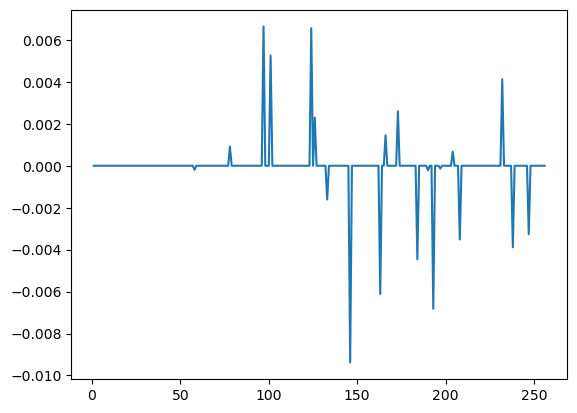

In [54]:
# Example usage
lambda_ = 0.01

beta = lasso_greedy_coordinate_descent(A, y, lambda_,
                               verbose = True)

plt.plot(np.arange(1, n+1), beta)

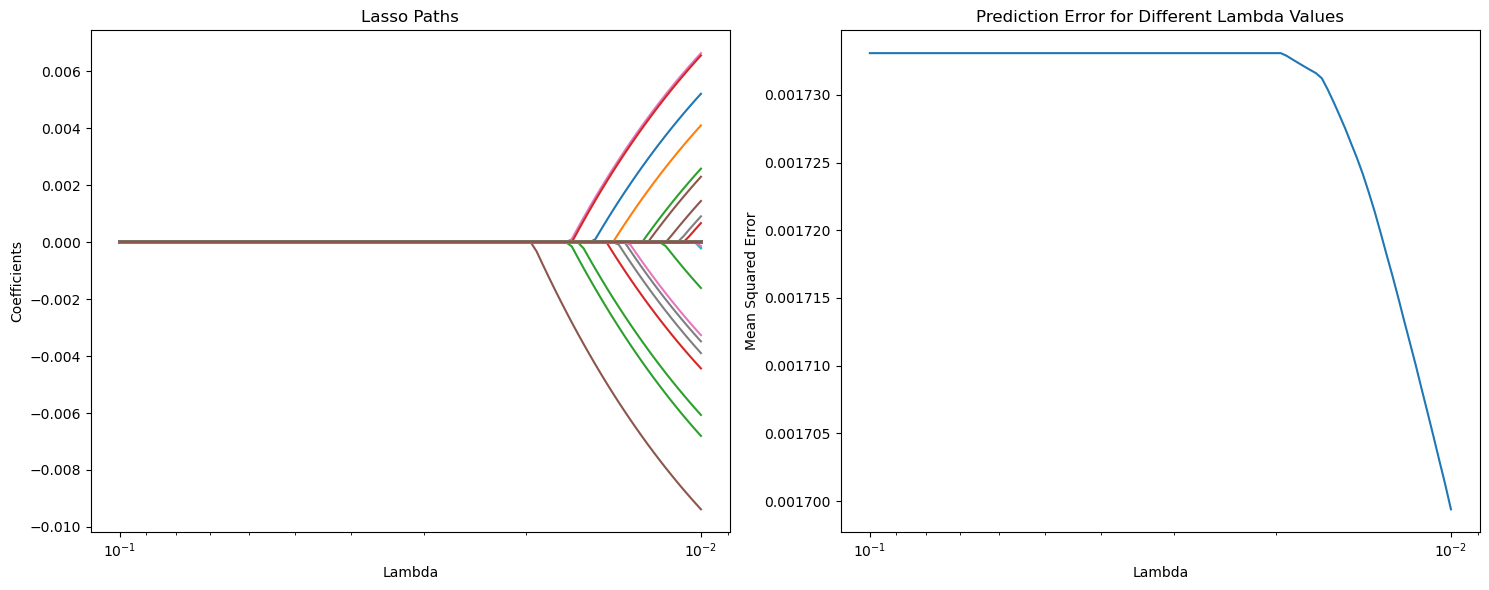

In [51]:
# Plotting the coefficient paths and prediction errors side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Coefficient paths plot
for i in range(coefficients.shape[1]):
    ax1.plot(lambda_values, coefficients[:, i])
ax1.set_xscale('log')
ax1.invert_xaxis()  # Invert the x-axis
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Coefficients')
ax1.set_title('Lasso Paths')

# Prediction errors plot
ax2.plot(lambda_values, errors)
ax2.set_xscale('log')
ax2.invert_xaxis()  # Invert the x-axis
ax2.set_xlabel('Lambda')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Prediction Error for Different Lambda Values')

plt.tight_layout()
plt.show()


In [19]:
from scipy.optimize import linprog

## Method 1

vF = np.ones(2 * n)

mAeq = np.hstack((A, -A))
vBeq = y

vLowerBound = np.zeros(2 * n)
vUpperBound = np.inf * np.ones(2 * n)

res = linprog(vF, A_eq=mAeq, b_eq=vBeq, bounds=list(zip(vLowerBound, vUpperBound)))

vX = res.x[:n] - res.x[n:]

np.allclose(x0, vX)

True

In [22]:
import cvxpy as cp
import numpy as np

x = cp.Variable(n)

# Create the optimization problem
objective = cp.Minimize(cp.norm(x, 1))
constraints = [A @ x == y]
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Retrieve the solution
x_sol = x.value

print("obj val=", problem.solve())

np.allclose(x0, x_sol)

obj val= 11.788696421666058


True

### Quantile regression



- Linear regression models the mean of the response. 

- However, in certain cases, the error variance may not be constant, the distribution of the response variable may exhibit asymmetry, or we may be interested in capturing specific quantiles of the response variable. 

- In such situations, quantile regression provides a more suitable modeling approach.


<div>
<img src="quantreg.png" alt="Quantile Regression" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.8\textwidth]{quantreg.png}
\end{center}

- In a $\tau$-quantile regression, we minimize the loss function 
$$
f(\beta) = \sum_{i=1}^{n} \rho_{\tau}(y_i - x_i^T\beta),
$$ 
where $\rho_{\tau}(z) = z(\tau - 1_\{z < 0\})$. Writing $y - X\beta = r^+ - r^-$, this is equivalent to the LP

$$
\begin{aligned}
\text{minimize } & \tau^T 1^Tr^+ + (1 - \tau) 1^T r^- = y - X\beta \\
\text{subject to } & r^+ - r^- = y - X\beta \\
& r^+ \succeq 0, r^- \succeq 0
\end{aligned}
$$
in $r^+$, $r^-$, and $\beta$.

### $\ell_1$ Regression

A popular method in robust statistics is the median absolute deviation (MAD) regression that minimizes the $\ell_1$ norm of the residual vector $||\mathbf{y} - \mathbf{X}\boldsymbol{\beta}||_1$. This apparently is equivalent to the LP
$$
\begin{aligned}
\text{minimize} \quad & 1^T(\mathbf{r}^+ + \mathbf{r}^-) \\
\text{subject to} \quad & \mathbf{r}^+ - \mathbf{r}^- = \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \\
& \mathbf{r}^+ \succeq 0, \quad \mathbf{r}^- \succeq 0
\end{aligned}
$$
in $\mathbf{r}^+$, $\mathbf{r}^-$, and $\boldsymbol{\beta}$.

$\ell_1$ regression = MAD = median-quantile regression.


### Dantzig selector

- [Candes and Tao 2007](https://projecteuclid.org/journals/annals-of-statistics/volume-35/issue-6/The-Dantzig-selector--Statistical-estimation-when-p-is-much/10.1214/009053606000001523.full) Propose a variable selection method called the Dantzig selector that solves:
$$
\text{minimize } ||X^T(y - X\beta)||_\infty \\
\text{subject to } \sum_{j=1}^p |\beta_j| ≤ t,
$$
which can be transformed to an LP. 

- The method is named after George Dantzig, who invented the simplex method for efficiently solving LPs in the 1950s.

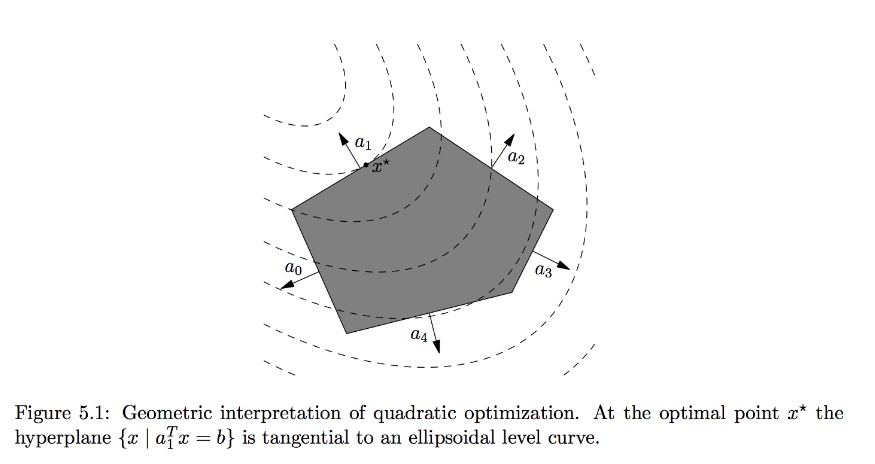

In [23]:
from IPython.display import Image, display

# Adjust the file path as necessary
file_path = "qp.jpg"

# Display the image with 80% width
display(Image(filename=file_path, width=600))


## Quadratic Programming


- A quadratic program (QP) has a quadratic objective function and affine constraint functions:

$$
\begin{aligned}
\text{minimize }& \frac{1}{2}\mathbf{x}^T\mathbf{P}\mathbf{x} + \mathbf{q}^T\mathbf{x} + \mathbf{r}\\
\text{subject to }& \mathbf{G}\mathbf{x} \preceq \mathbf{h}\\
           & \mathbf{A}\mathbf{x} = \mathbf{b},
\end{aligned}
$$
where we require $\mathbf{P} \in \mathbb{S}^n_+$ (why?). Apparently, linear programming (LP) is a special case of QP with $\mathbf{P} = \mathbf{0}_{n \times n}$.

### Examples

- Least squares with linear constraints. For example, nonnegative least squares (NNLS)

$$
\begin{aligned}
\text{minimize }& \frac{1}{2}\|\mathbf{y} - \mathbf{X}\mathbf{\beta}\|_2^2 \\
\text{subject to }& \mathbf{\beta} \succeq \mathbf{0} 
\end{aligned}
$$

- Lasso ([Tibshirani 1996](https://www.jstor.org/stable/2346178)) minimizes the least squares loss with the $\ell_1$ (lasso) penalty
$$
\text{minimize }\frac{1}{2}\|\mathbf{y} - \beta_0\mathbf{1} - \mathbf{X}\mathbf{\beta}\|_2^2 + \lambda \|\mathbf{\beta}\|_1,
$$
where $\lambda> 0$ is the tuning parameter.

    - Write $\beta = \beta^+ - \beta^-$, the equivalent QP is
$$
\begin{aligned}
\text{minimize }& \quad \frac{1}{2}(\beta^+ - \beta^-)^T X^T (I - \frac{1}{n}11^T) X (\beta^+ - \beta^-) +\\
& y^T (I - \frac{1}{n}11^T) X (\beta^+ - \beta^-) + \lambda 1^T (\beta^+ + \beta^-) \\
\text{subject to }& \quad \beta^+ \succeq 0, \quad \beta^- \succeq 0
\end{aligned}
$$    
in $\beta^+, \beta^-$.

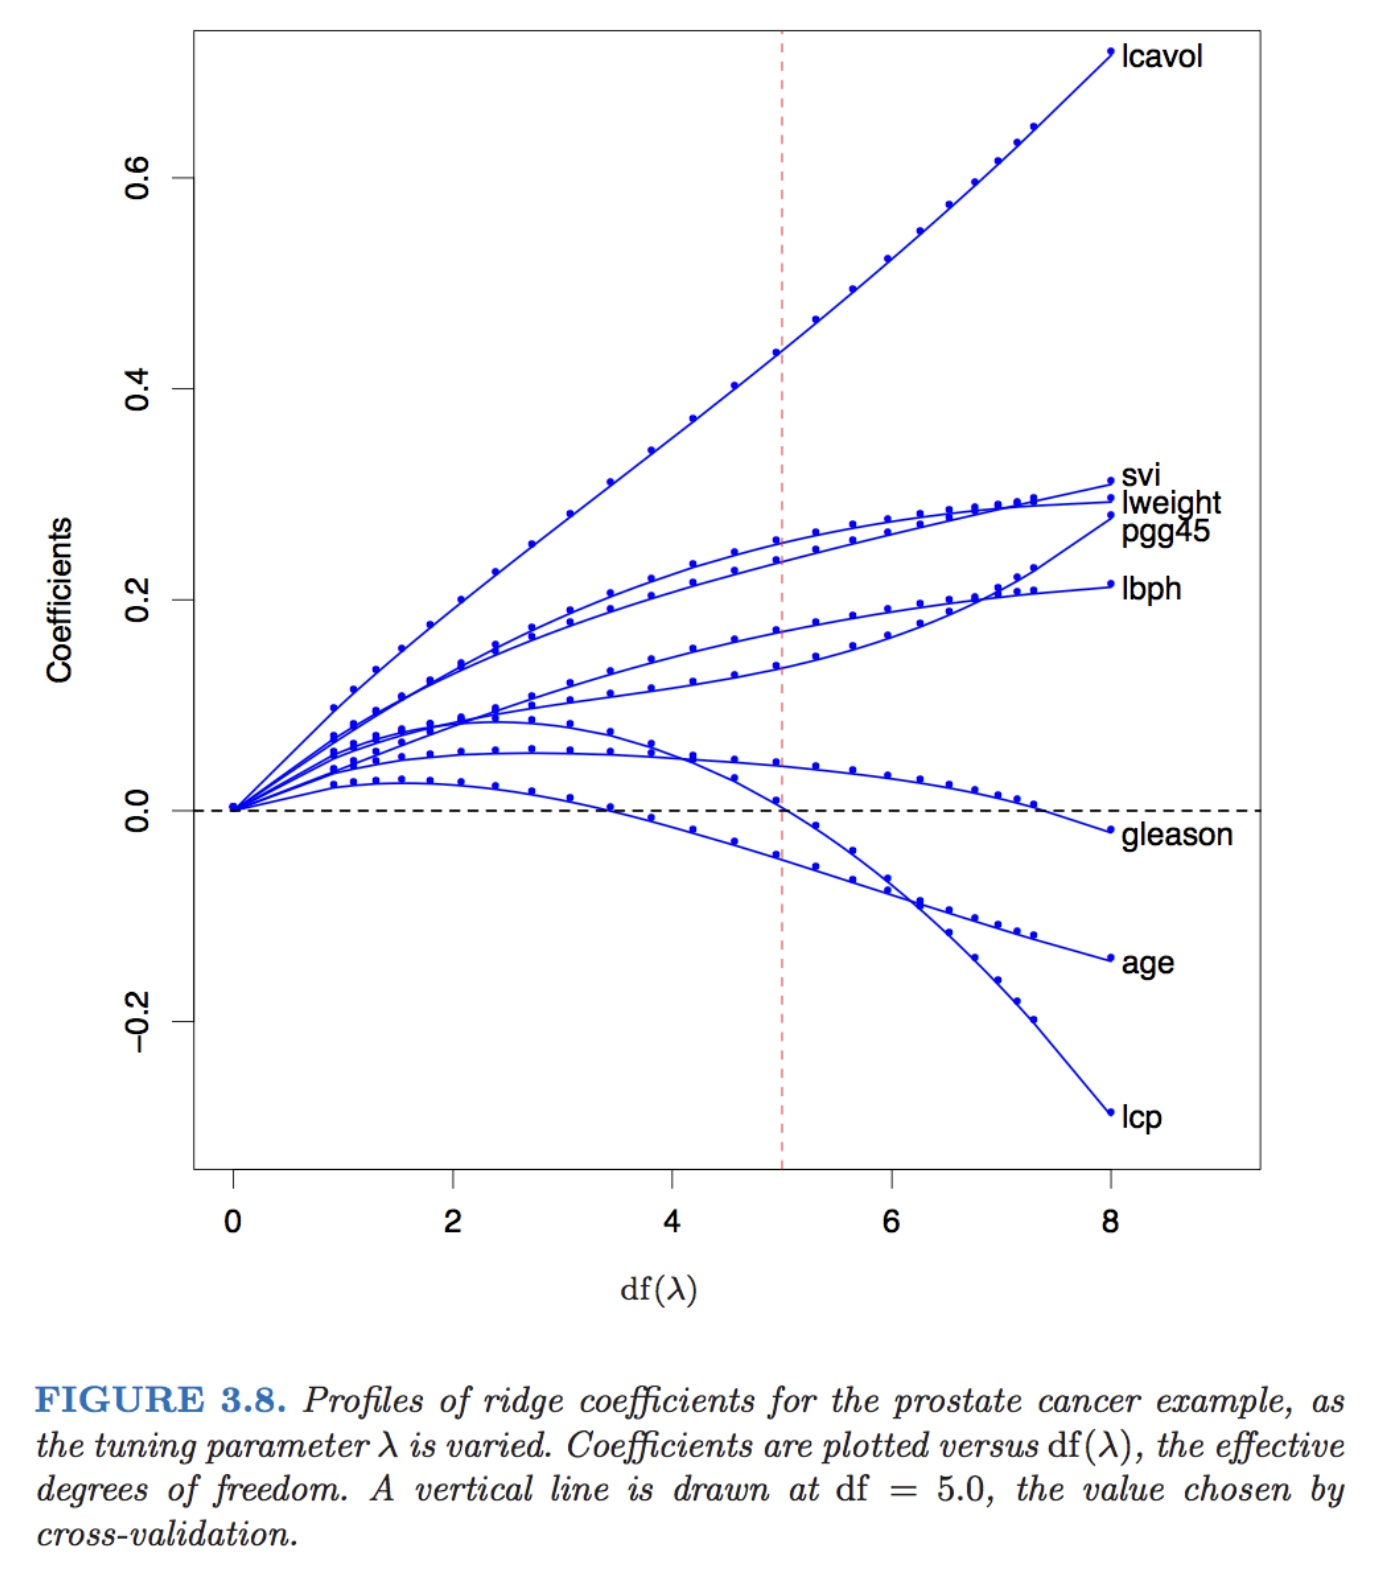

In [24]:
# Adjust the file path as necessary
file_path = "ridge.jpg"

# Display the image with 80% width
display(Image(filename=file_path, width=600))


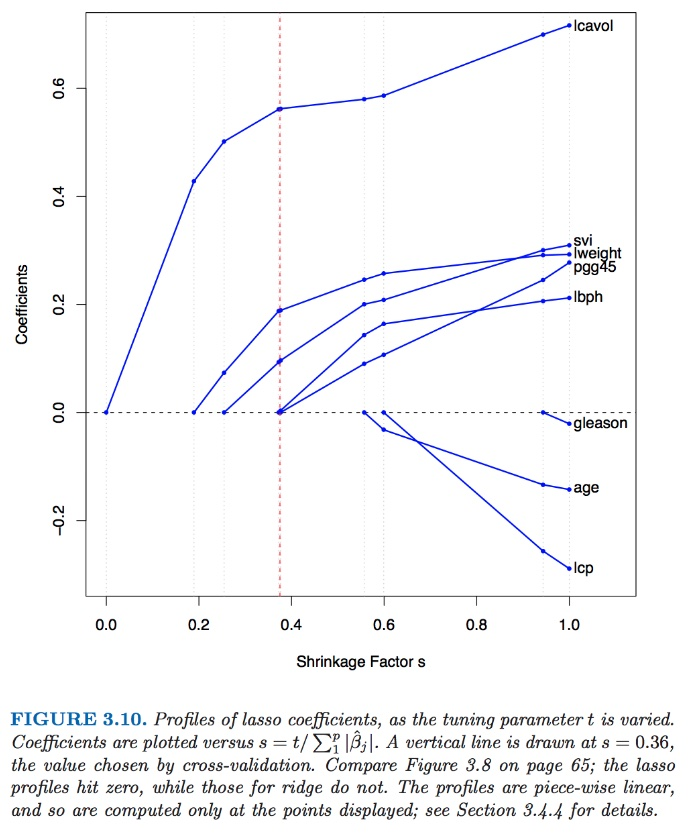

In [25]:
# Adjust the file path as necessary
file_path = "lasso.jpg"

# Display the image with 80% width
display(Image(filename=file_path, width=600))


- Elastic Net [Zou and Hastie (2005)](https://www.jstor.org/stable/3647580):

$$
\text{minimize }\frac{1}{2}\|\mathbf{y} - \beta_0\mathbf{1} - \mathbf{X}\mathbf{\beta}\|_2^2 + \lambda \left( \alpha \|\mathbf{\beta}\|_1 + (1-\alpha) \|\mathbf{\beta}\|_2^2 \right),
$$


- Image denoising by the total variation (TV) penality or the anisotropic penalty
$$
\frac{1}{2}\|y - x\|_F^2 + \lambda \sum_{i,j} \sqrt{(x_{i+1,j} - x_{i,j})^2 + (x_{i,j+1} - x_{i,j})^2}.
$$

$$
\frac{1}{2}\|y - x\|_F^2 + \lambda \sum_{i,j} \left(|x_{i+1,j} - x_{i,j}| + |x_{i,j+1} - x_{i,j}| \right).
$$

- The Huber loss
$$
\phi(r) = \begin{cases}
\frac{r^2}{M} & \text{if } |r| \leq M \\
r^2 - 2M|r| + M^2 & \text{if } |r| > M
\end{cases}
$$
is commonly used in robust statistics. The robust regression problem
$$
\text{minimize }\sum_{i=1}^{n} \phi(y_i - \beta_0 - x_i^T\beta)
$$
can be transformed to a QP
$$
\begin{aligned}
\text{minimize }\quad & u^Tu + 2M1^Tv - u^T v \\
\text{subjec to }\quad & u - v \preceq y - X\beta \preceq u + v\\
& 0 \preceq u \preceq M1, \quad v \succeq 0
\end{aligned}
$$
in $u, v \in \mathbb{R}^n$ and $\beta \in \mathbb{R}^p$. Hint: write $|r_i| = (|r_i| \wedge M) + (|r_i| - M) = u_i + v_i$.

- Support Vector Machines (SVM) In two-class classification problems, we are given training data $(\mathbf{x}_i, y_i), i=1,\ldots,n$, where $\mathbf{x}_i \in \mathbb{R}^n$ are feature vectors and $y_i \in \{-1,1\}$ are class labels. The SVM solves the optimization problem:

$$
\text{minimize } \sum_{i=1}^{n} \left[1 - y_i(\beta_0 + \sum_{j=1}^{p} x_{ij}\beta_j)\right]_+ + \lambda\|\beta\|_2^2,
$$
where $\lambda \geq 0$ is a tuning parameter. This is a quadratic programming problem.

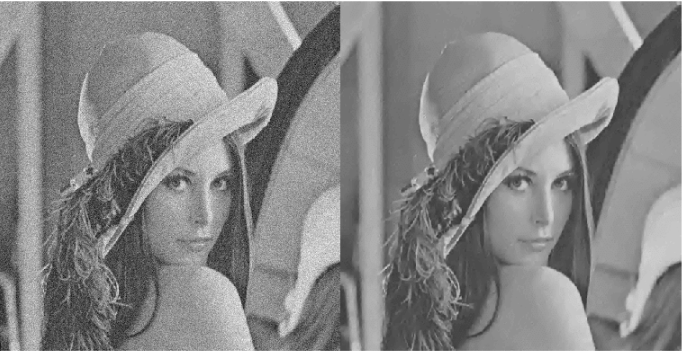

In [26]:
# Adjust the file path as necessary
file_path = "lena.jpg"

# Display the image with 80% width
display(Image(filename=file_path, width=600))
